In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
with open("logs/history/penmark.txt", "r") as f:
    lines = f.readlines()

    df = pd.DataFrame(columns=["fold", "epoch", "lr", "Train loss", "Validation loss", "Validation accuracy", "QWKappa", "QWKappa Karolinska", "QWKappa Radboud"])
    for line in lines:
        line = line.replace("\n", "")
        split_data = line.split(" | ")
        df.loc[len(df)] = split_data

In [10]:
def keep_only_value(value):
    return value.split(": ")[1]

df = df.map(keep_only_value)
df["fold"] = df["fold"].astype(int)
df["epoch"] = df["epoch"].astype(int)
df["lr"] = df["lr"].astype(float)
df["Train loss"] = df["Train loss"].astype(float)
df["Validation loss"] = df["Validation loss"].astype(float)
df["Validation accuracy"] = df["Validation accuracy"].astype(float)
df["QWKappa"] = df["QWKappa"].astype(float)
df["QWKappa Karolinska"] = df["QWKappa Karolinska"].astype(float)
df["QWKappa Radboud"] = df["QWKappa Radboud"].astype(float)

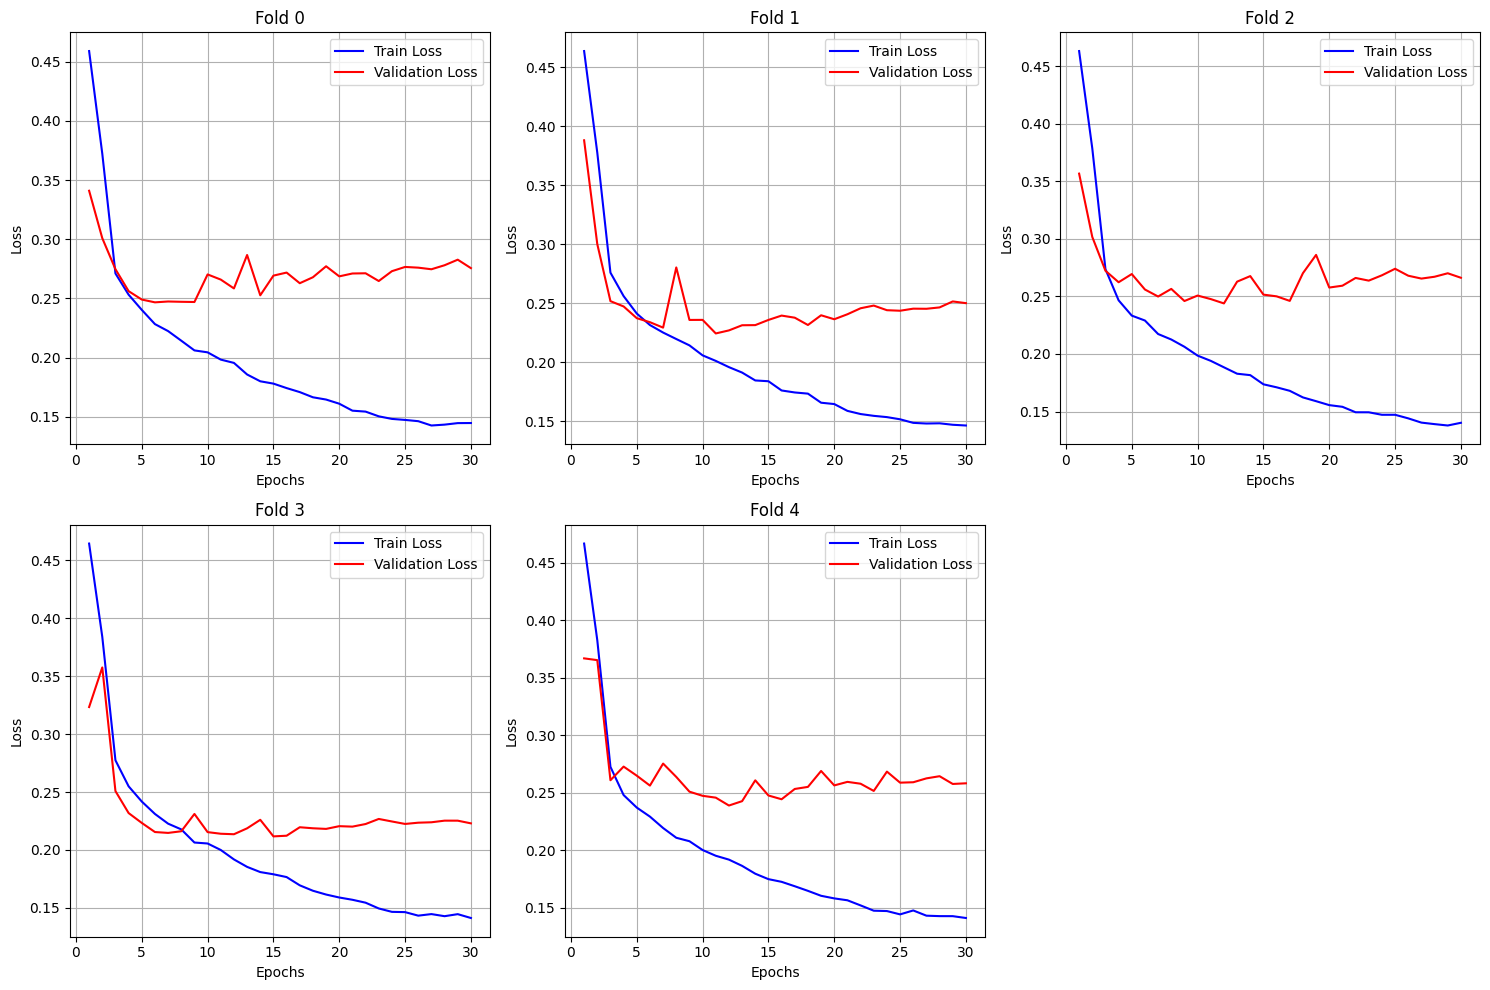

In [11]:
folds = df["fold"].unique()
num_folds = len(folds)
cols = 3  # Número de gráficos por linha
rows = (num_folds + cols - 1) // cols  # Calcula o número de linhas necessárias

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Achatar os eixos para fácil iteração

for idx, fold in enumerate(folds):
    fold_data = df[df["fold"] == fold]
    ax = axes[idx]
    ax.plot(fold_data["epoch"], fold_data["Train loss"], label="Train Loss", color="blue")
    ax.plot(fold_data["epoch"], fold_data["Validation loss"], label="Validation Loss", color="red")
    ax.set_title(f"Fold {fold}")
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True)

# Remove os eixos extras se não forem usados
for i in range(len(folds), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


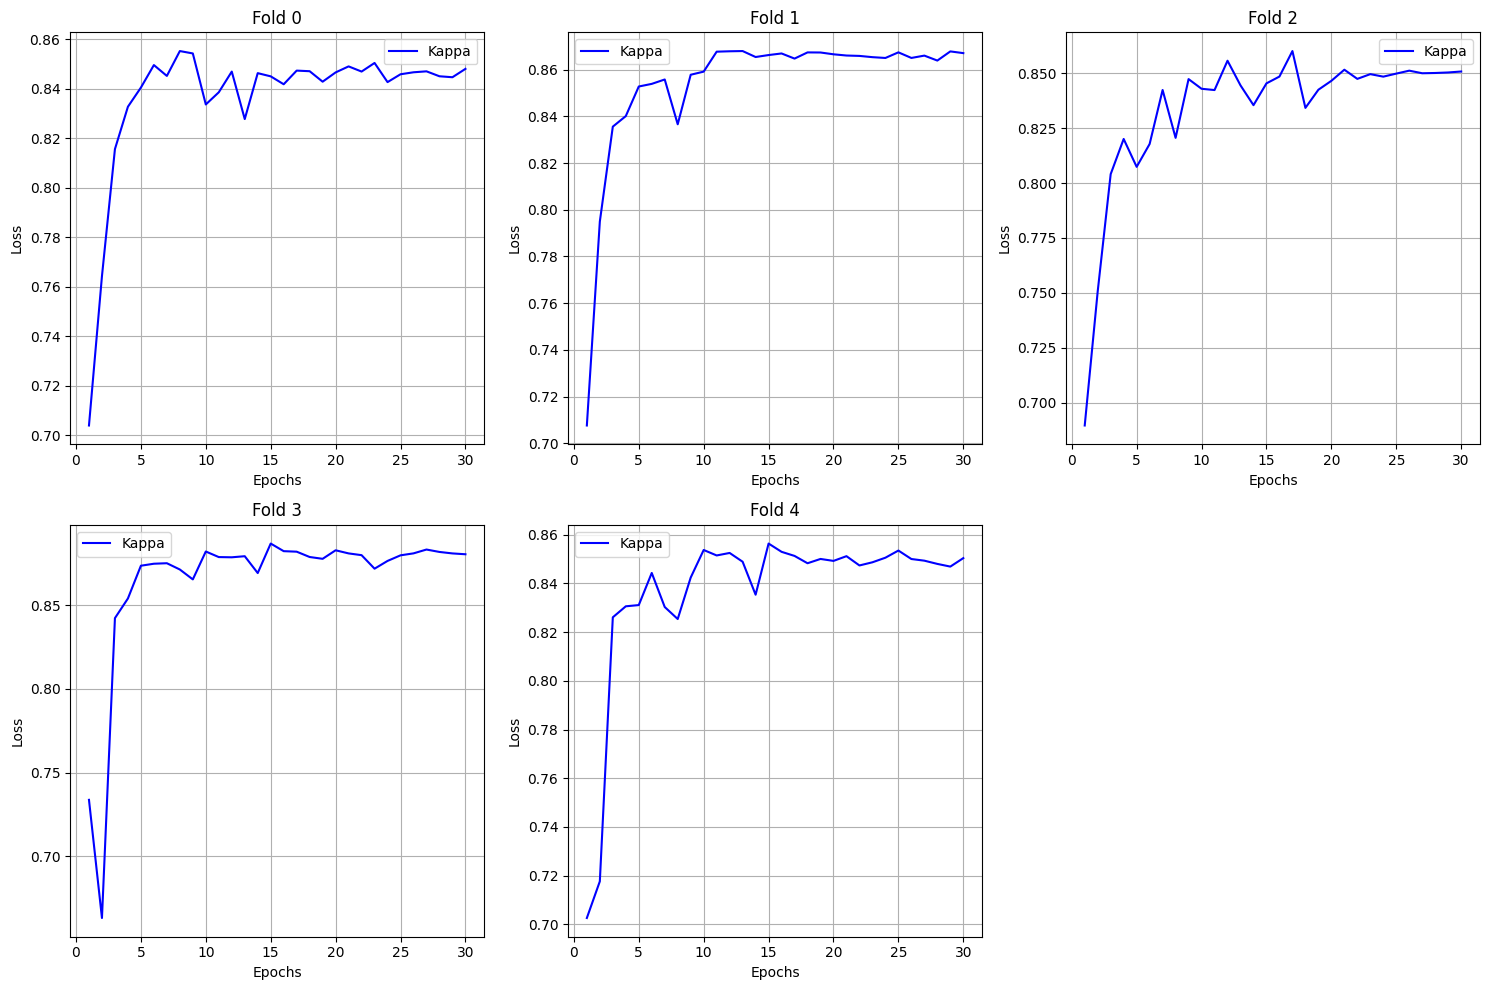

In [12]:
folds = df["fold"].unique()
num_folds = len(folds)
cols = 3  # Número de gráficos por linha
rows = (num_folds + cols - 1) // cols  # Calcula o número de linhas necessárias

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Achatar os eixos para fácil iteração

for idx, fold in enumerate(folds):
    fold_data = df[df["fold"] == fold]
    ax = axes[idx]
    ax.plot(fold_data["epoch"], fold_data["QWKappa"], label="Kappa", color="blue")    
    ax.set_title(f"Fold {fold}")
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True)

for i in range(len(folds), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
